In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns



df_kepler=pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr&format=csv")


In [ ]:
df_kepler.shape


(9564, 11)

In [ ]:
#Limpieza
df_kepler_clean= df_kepler.dropna().reset_index(drop=True)

planet_radius=df_kepler_clean["koi_prad"]


In [ ]:
#Filtrado
def filter(df,col,iqr_score):
  iqr_col=df[col].quantile(0.75)-df[col].quantile(0.25)
  filter_lower=df[col]>df[col].quantile(0.25)-(iqr_col*iqr_score)
  filter_upper=df[col]<df[col].quantile(0.75)+(iqr_col*iqr_score)
  return df[filter_lower & filter_upper]

df_filtered=filter(df_kepler_clean,'koi_prad',2)
planet_radius_fil=df_filtered["koi_prad"]

In [ ]:
#Tecnica Bootstrap
def sampling_means(x,N):
  means=[]
  for i in range(100000):
    sample=x.sample(n=N, replace=True)
    means.append(sample.mean())
  return pd.Series(means)

In [ ]:
means_radius=sampling_means(planet_radius_fil, int(np.floor(planet_radius_fil.size*0.2)))

Text(0, 0.5, 'Densidad de probabilidad')

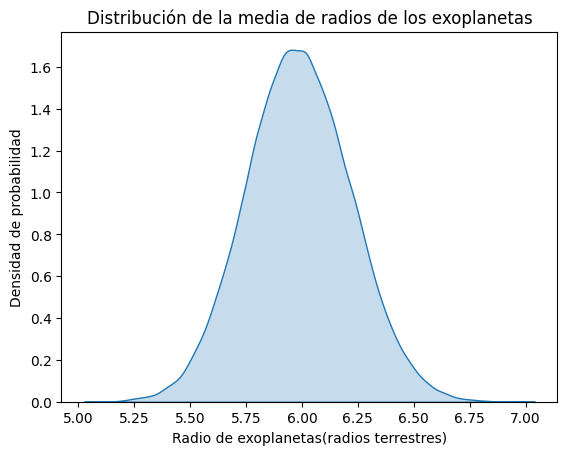

In [ ]:
ax=sns.kdeplot(means_radius, fill=True)
ax.set_title('Distribución de la media de radios de los exoplanetas')
ax.set_xlabel('Radio de exoplanetas(radios terrestres)')
ax.set_ylabel('Densidad de probabilidad')

In [ ]:
print(f'Sesgo de la distribución(skewness):{means_radius.skew()}, Curtosis relativa:{means_radius.kurtosis()}, Desviación estandar:{means_radius.std()} ')

Sesgo de la distribución(skewness):0.052556141078314286, Curtosis relativa:0.0034605386140564853, Desviación estandar:0.23455958924716555 


In [ ]:
planet_radius_fil.std()/np.sqrt(planet_radius_fil.size*0.2)

0.23397232896216555

In [ ]:
print(f'Intervalo de confianza al 90%:{means_radius.quantile(0.05):.5} < {means_radius.mean():.5} < {means_radius.quantile(0.95):.5}')

Intervalo de confianza al 90%:5.6027 < 5.9847 < 6.3733


In [ ]:
print(f'Intervalo de confianza al 95%:{means_radius.quantile(0.025):.5} < {means_radius.mean():.5} < {means_radius.quantile(0.975):.5}')
print(f'Intervalo de confianza al 99%:{means_radius.quantile(0.005):.5} < {means_radius.mean():.5} < {means_radius.quantile(0.995):.5}')

Intervalo de confianza al 95%:5.5321 < 5.9847 < 6.4502
Intervalo de confianza al 99%:5.3885 < 5.9847 < 6.6013
